# Explore here

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# VER BASE DE DATOS:

df_diabetes = pd.read_csv('../data/raw/diabetes.csv')
print(df_diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
print(df_diabetes.shape)

(768, 9)


In [4]:
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
print(df_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df_diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


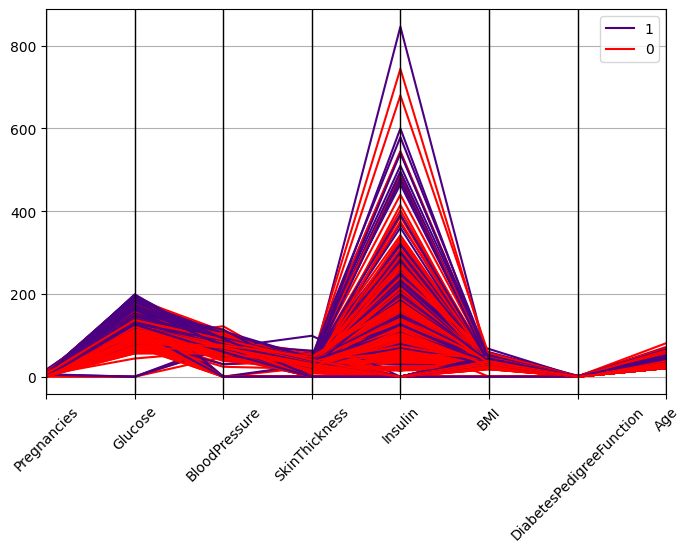

In [8]:
# VISUALIZACIÓN PARALELA DE LOS DATOS ORIGINALES:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(df_diabetes, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()


In [9]:
# DATOS ESCALADOS:

data_sc = pd.DataFrame(StandardScaler().fit_transform(df_diabetes.drop('Outcome', axis=1)), columns=df_diabetes.columns[:-1])
data_sc['Outcome'] = df_diabetes['Outcome']
print(data_sc)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

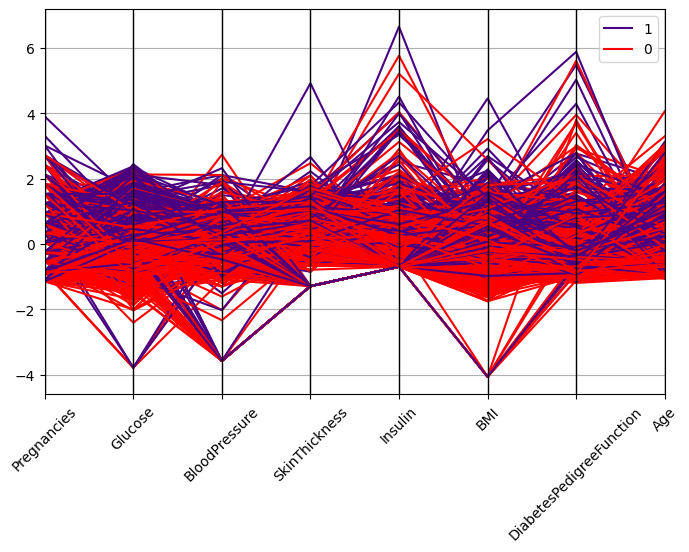

In [10]:
# VISUALIZACIÓN DE DATOS ESCALADOS:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()

In [11]:
# DIVISIÓN DE LOS DATOS:

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

print(X, y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ENTRENAMIENTO DE MODELOS:

In [13]:
# ÁRBOL SIMPLE:

simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=20,
                       min_samples_split=30, random_state=42)

In [14]:
# ÁRBOL COMPLEJO:

complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

VISUALIZACIÓN DE LOS ÁRBOLES:

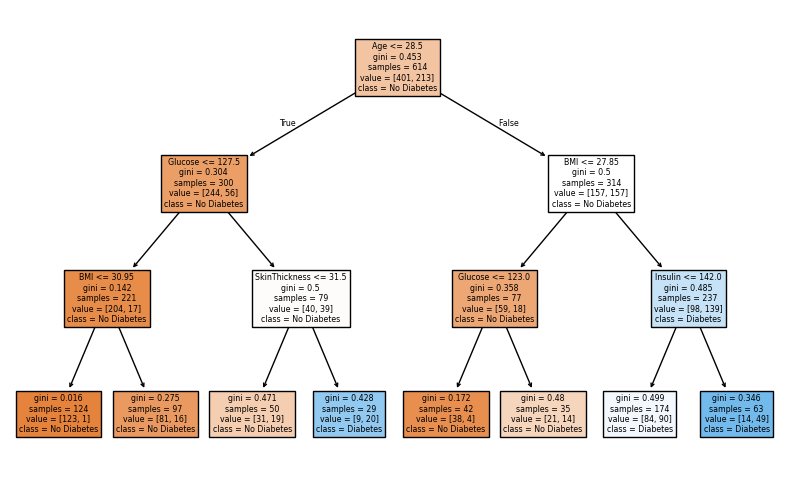

In [15]:
# VISUALIZACIÓN ÁRBOL SIMPLE:

plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [16]:
X_train[(X_train['Glucose'] > 16.795) & (X_train['BMI'] <= 0.073)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
145,0,102,75,23,0,0.0,0.572,21
426,0,94,0,0,0,0.0,0.256,25
9,8,125,96,0,0,0.0,0.232,54
522,6,114,0,0,0,0.0,0.189,26
371,0,118,64,23,89,0.0,1.731,21
684,5,136,82,0,0,0.0,0.640,69


In [17]:
# REPRESENTACIÓN TEXTUAL DEL ÁRBOL:

text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



FUNCIONES MÉTRICAS:

In [18]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [19]:
# EVALUACIÓN DE MODELOS:

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

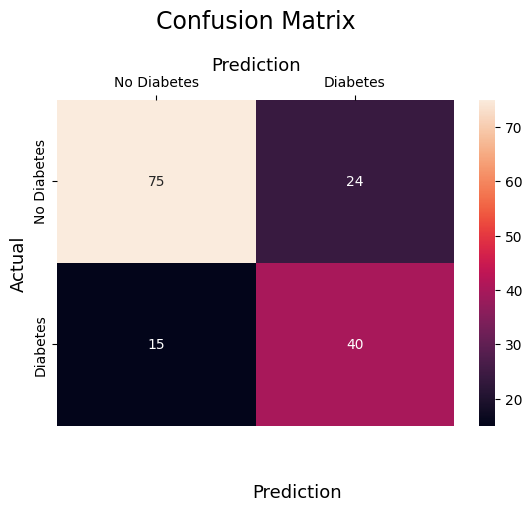

In [20]:
# MATRIZ DE CONFUSIÓN:

cm = confusion_matrix(y_test,test_pred_complex)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

MÉTRICAS FINALES:

In [21]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)
print(f"Árbol Complejo: {get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)}")

# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)
print(f"Árbol Simple: {get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)}")

Árbol Complejo:             Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000      1.000  1.000000     1.000000
Test        0.746753  0.672269  0.742424      0.625  0.727273     0.757576
Diferencia  0.253247  0.327731  0.257576      0.375  0.272727     0.242424
Árbol Simple:             Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.737785  0.663883  0.739823   0.597744  0.746479     0.733167
Test        0.636364  0.594203  0.660606   0.493976  0.745455     0.575758
Diferencia  0.101421  0.069680  0.079217   0.103768  0.001024     0.157410
